# Import

Here you can find the main imports to let the code run.
If you don't want to run all of them at the same time, at the beginning of each step algorithm are listed the necessary imports for the specific execution.

In [6]:
from step2.GreedyLearner import *
from step3.Ucb import *
from step3.Ucb import Ucb as Ucb3
from step3.TS import *
from step3.TS import TS as TS3
from step4.UcbStep4 import *
from step4.UcbStep4 import Ucb as Ucb4
from step4.TSstep4 import *
from step4.TSstep4 import TS as TS4
from step5.UcbStep5 import *
from step5.UcbStep5 import Ucb as Ucb5
from step5.TSstep5 import *
from step5.TSstep5 import TS as TS5
from step6.Ucb_Sliding_window import *
from step6.Ucb_Sliding_window import *
from step7.ContextGenerator import ContextGenerator
from step7.ContextNode import ContextNode
from step7.ContextualLearner import ContextualLearner
from step7.UcbStep7 import Ucb
from step7.TSstep7 import TS

# Settings

We've developed a file called "Settings.py" where you can find all the relevant variables involved in the creation of the plots.
* NUM_OF_DAYS: it represents the x-length of the plot, the number of days we use for learning the best arms
* DAILY_INTERACTIONS: it represents the number of user interaction per day during which we do not update the arms but we just observe the rewards, increasing it lead to discover quicker the best arms
* NUM_PLOT_ITERATION: it represents the number of time we restart the entire algorithm from scratch, increasing it lead to consider more samples and so finding more reliable values

We suggest to use different values in STEP 6 as the environment is no more static and so requires more data.

In [73]:
Settings.NUM_OF_DAYS = 500

Settings.DAILY_INTERACTIONS = 100

Settings.NUM_PLOT_ITERATION = 5

# Step 2

## Greedy Learner

In [8]:
from step2.GreedyLearner import *

In [74]:
graph_sample = Graph(mode="full", weights=True)
env = EnvironmentPricing(4, graph_sample, 1)
learner = Greedy_Learner(env.prices, env.conversion_rates, env.classes, env.secondaries, env.num_product_sold,
                         graph_sample, env.alpha_ratios)
learner.update()
#print(learner.current_reward)
print('\nFINAL')
print('Greedy algorithm chosen arms: ',learner.max_idxs)
print('Clearvoyant best arms: [[0, 1, 2, 2, 3], [0, 2, 1, 0, 2], [1, 3, 1, 1, 1]]')
print('Average reward with greedy algorithm choices: ', learner.revenue_given_arms(learner.max_idxs[0],0),
      learner.revenue_given_arms(learner.max_idxs[1],1), learner.revenue_given_arms(learner.max_idxs[2],2))
print('Average reward with best arms: ', learner.revenue_given_arms([0, 1, 2, 2, 3],0),
      learner.revenue_given_arms([0, 2, 1, 0, 2],1), learner.revenue_given_arms([1, 3, 1, 1, 1],2))
print('Average regret per iteration: ', learner.revenue_given_arms([0, 1, 2, 2, 3],0) - learner.revenue_given_arms(learner.max_idxs[0],0),
      learner.revenue_given_arms([0, 2, 1, 0, 2], 1) - learner.revenue_given_arms(learner.max_idxs[1],1),
      learner.revenue_given_arms([1, 3, 1, 1, 1], 2) - learner.revenue_given_arms(learner.max_idxs[2],2))


NameError: name 'learner' is not defined

# Step3

## UCB-3

In [10]:
from step3.Ucb import Ucb as Ucb3

[0 0 0 0 0]
[1 1 1 1 1]
[2 2 2 2 2]
[3 3 3 3 3]
[0 1 2 2 0]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 0 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 0 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 1 1]
[0 1 2 0 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 2]
[0 1 2 3 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 1 0 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 1 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1

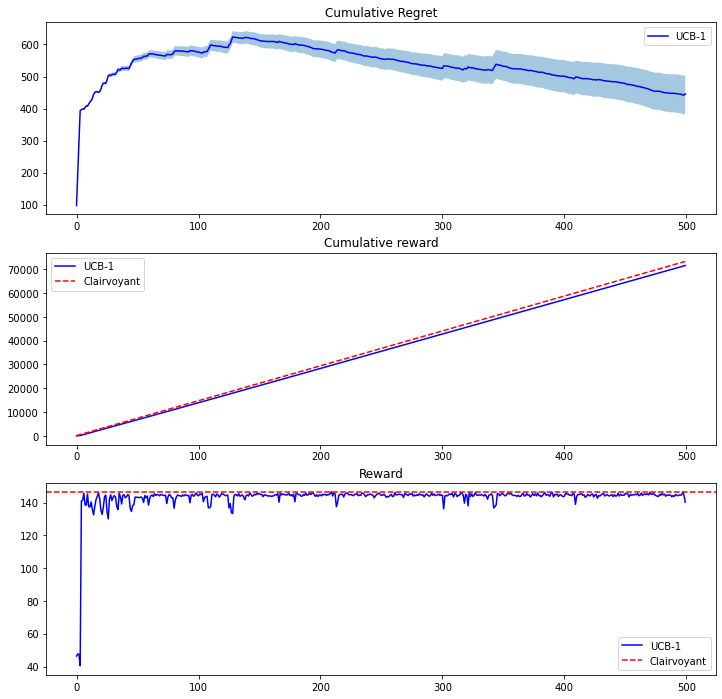

In [75]:
final_reward= np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))
final_cumulative_regret = np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))
final_cumulative_reward = np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))

for k in range (Settings.NUM_PLOT_ITERATION):
    graph = Graph(mode="full", weights=True)
    env = EnvironmentPricing(4, graph, 1)
    learner = Ucb3(4, env.prices, env.secondaries, env.num_product_sold[0], graph, env.alpha_ratios[0][1:])
    clairvoyant = Clairvoyant(env.prices, env.conversion_rates, env.classes, env.secondaries, env.num_product_sold,
                              graph, env.alpha_ratios)
    best_revenue = clairvoyant.revenue_given_arms([0, 1, 2, 2, 3], 0)
    opt_rew = []
    actual_rew = []
    for i in range(Settings.NUM_OF_DAYS):
        pulled_arms = learner.act()
        print(pulled_arms)
        for j in range(Settings.DAILY_INTERACTIONS):
            visited_products, num_bought_products, a = env.round(pulled_arms)
            learner.updateHistory(pulled_arms, visited_products, num_bought_products)

        learner.update(pulled_arms)
        actual_rew.append(learner.revenue_given_arms(arms=pulled_arms))
        opt_rew.append(best_revenue)

    final_cumulative_regret[k, :] = np.cumsum(opt_rew) - np.cumsum(actual_rew)
    final_cumulative_reward[k,:] = np.cumsum(actual_rew)
    final_reward[k:] = actual_rew


#REGRET
print("FINAL CUM REGRET: ")
print(final_cumulative_regret)

mean_cumulative_regret = np.mean(final_cumulative_regret, axis=0)
stdev_regret= np.std(final_cumulative_regret, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_cumulative_regret)


#Cumulative REWARD
print("FINAL CUM REWARD: ")
print(final_cumulative_reward)

mean_cumulative_reward = np.mean(final_cumulative_reward, axis=0)
stdev_cumulative_reward= np.std(final_cumulative_reward, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_cumulative_reward)

#AREWARD
print("FINAL REWARD: ")
print(final_reward)

mean_final_reward = np.mean(final_reward, axis=0)
stdev_reward= np.std(final_reward, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_final_reward)



best_revenue_array = [best_revenue for i in range(Settings.NUM_OF_DAYS)]


fig, ax = fig, ax = plt.subplots(nrows=3,ncols=1, figsize=(12,12))
ax[0].plot(mean_cumulative_regret, color='blue', label='UCB-1')
ax[0].fill_between(range(Settings.NUM_OF_DAYS), mean_cumulative_regret - stdev_regret,mean_cumulative_regret + stdev_regret, alpha=0.4)
ax[0].set_title('Cumulative Regret')

ax[1].plot(mean_cumulative_reward, color='blue', label='UCB-1')
ax[1].fill_between(range(Settings.NUM_OF_DAYS), mean_cumulative_reward - stdev_cumulative_reward, mean_cumulative_reward + stdev_cumulative_reward, alpha=0.4)
ax[1].plot(np.cumsum(best_revenue_array), color='red', linestyle='--', label='Clairvoyant')
ax[1].set_title('Cumulative reward')

ax[2].plot(mean_final_reward, color='blue', label='UCB-1')
ax[2].fill_between(range(Settings.NUM_OF_DAYS), mean_final_reward - stdev_reward, mean_final_reward + stdev_reward, alpha=0.4)
ax[2].axhline(y=best_revenue, color='red', linestyle='--', label='Clairvoyant')
ax[2].set_title('Reward')


ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()

## TS-3

In [ ]:
from step3.TS import TS as TS3

[2, 1, 0, 1, 2]
[0, 1, 2, 2, 2]
[0, 1, 2, 2, 2]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 1, 0, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 0, 3]
[0, 1, 2, 0, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 0, 1]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 1, 2, 2]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 2]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 0, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2

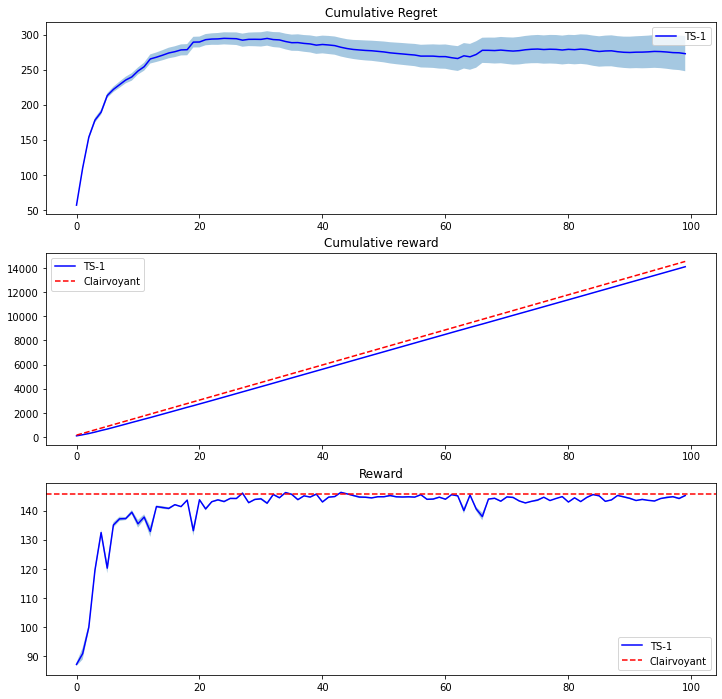

In [12]:
final_reward= np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))
final_cumulative_regret = np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))
final_cumulative_reward = np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))

for k in range (Settings.NUM_PLOT_ITERATION):
    graph = Graph(mode="full", weights=True)
    env = EnvironmentPricing(4, graph, 1)
    learner = TS3(4, env.prices, env.secondaries, env.num_product_sold[0], graph,env.alpha_ratios[0][1:])
    clairvoyant = Clairvoyant(env.prices, env.conversion_rates, env.classes, env.secondaries, env.num_product_sold,
                              graph, env.alpha_ratios)
    best_revenue = clairvoyant.revenue_given_arms([0, 1, 2, 2, 3], 0)
    opt_rew = []
    actual_rew = []
    for i in range(Settings.NUM_OF_DAYS):
        pulled_arms = learner.act()
        print(pulled_arms)
        for j in range(Settings.DAILY_INTERACTIONS):
            visited_products, num_bought_products, a = env.round(pulled_arms)
            learner.updateHistory(pulled_arms, visited_products, num_bought_products)

        learner.update(pulled_arms)
        actual_rew.append(learner.revenue_given_arms(arms=pulled_arms))
        opt_rew.append(best_revenue)

    final_cumulative_regret[k, :] = np.cumsum(opt_rew) - np.cumsum(actual_rew)
    final_cumulative_reward[k,:] = np.cumsum(actual_rew)
    final_reward[k:] = actual_rew


#REGRET
print("FINAL CUM REGRET: ")
print(final_cumulative_regret)

mean_cumulative_regret = np.mean(final_cumulative_regret, axis=0)
stdev_regret= np.std(final_cumulative_regret, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_cumulative_regret)


#Cumulative REWARD
print("FINAL CUM REWARD: ")
print(final_cumulative_reward)

mean_cumulative_reward = np.mean(final_cumulative_reward, axis=0)
stdev_cumulative_reward= np.std(final_cumulative_reward, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_cumulative_reward)

#AREWARD
print("FINAL REWARD: ")
print(final_reward)

mean_final_reward = np.mean(final_reward, axis=0)
stdev_reward= np.std(final_reward, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_final_reward)



best_revenue_array = [best_revenue for i in range(Settings.NUM_OF_DAYS)]


fig, ax = plt.subplots(nrows=3,ncols=1, figsize=(12,12))
ax[0].plot(mean_cumulative_regret, color='blue', label='TS-1')
ax[0].fill_between(range(Settings.NUM_OF_DAYS), mean_cumulative_regret - stdev_regret,mean_cumulative_regret + stdev_regret, alpha=0.4)
ax[0].set_title('Cumulative Regret')

ax[1].plot(mean_cumulative_reward, color='blue', label='TS-1')
ax[1].fill_between(range(Settings.NUM_OF_DAYS), mean_cumulative_reward - stdev_cumulative_reward, mean_cumulative_reward + stdev_cumulative_reward, alpha=0.4)
ax[1].plot(np.cumsum(best_revenue_array), color='red', linestyle='--', label='Clairvoyant')
ax[1].set_title('Cumulative reward')

ax[2].plot(mean_final_reward, color='blue', label='TS-1')
ax[2].fill_between(range(Settings.NUM_OF_DAYS), mean_final_reward - stdev_reward, mean_final_reward + stdev_reward, alpha=0.4)
ax[2].axhline(y=best_revenue, color='red', linestyle='--', label='Clairvoyant')
ax[2].set_title('Reward')


ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()

# Step 4

## UCB-4

In [ ]:
from step4.UcbStep4 import *
from step4.UcbStep4 import Ucb as Ucb4

In [ ]:
final_reward= np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))
final_cumulative_regret = np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))
final_cumulative_reward = np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))

for k in range (Settings.NUM_PLOT_ITERATION):
    graph = Graph(mode="full", weights=True)
    env = EnvironmentPricing(4, graph, 1)
    learner = Ucb4(4, env.prices, env.secondaries, graph)
    clairvoyant = Clairvoyant(env.prices, env.conversion_rates, env.classes, env.secondaries, env.num_product_sold,
                              graph, env.alpha_ratios)
    best_revenue = clairvoyant.revenue_given_arms([0, 1, 2, 2, 3], 0)
    opt_rew = []
    actual_rew = []
    for i in range(Settings.NUM_OF_DAYS):
        pulled_arms = learner.act()
        print(pulled_arms)
        for j in range(Settings.DAILY_INTERACTIONS):
            visited_products, num_bought_products, num_primary = env.round(pulled_arms)
            learner.updateHistory(pulled_arms, visited_products, num_bought_products, num_primary)

        learner.update(pulled_arms)
        actual_rew.append(learner.revenue_given_arms(pulled_arms))
        opt_rew.append(best_revenue)

    a = learner.revenue_given_arms(pulled_arms)
    final_cumulative_regret[k, :] = np.cumsum(opt_rew) - np.cumsum(actual_rew)
    final_cumulative_reward[k,:] = np.cumsum(actual_rew)
    final_reward[k:] = actual_rew


#REGRET
print("FINAL CUM REGRET: ")
print(final_cumulative_regret)

mean_cumulative_regret = np.mean(final_cumulative_regret, axis=0)
stdev_regret= np.std(final_cumulative_regret, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_cumulative_regret)


#Cumulative REWARD
print("FINAL CUM REWARD: ")
print(final_cumulative_reward)

mean_cumulative_reward = np.mean(final_cumulative_reward, axis=0)
stdev_cumulative_reward= np.std(final_cumulative_reward, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_cumulative_reward)

#AREWARD
print("FINAL REWARD: ")
print(final_reward)

mean_final_reward = np.mean(final_reward, axis=0)
stdev_reward= np.std(final_reward, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_final_reward)



best_revenue_array = [best_revenue for i in range(Settings.NUM_OF_DAYS)]


fig, ax = fig, ax = plt.subplots(nrows=3,ncols=1, figsize=(12,12))
ax[0].plot(mean_cumulative_regret, color='blue', label='UCB-4')
ax[0].fill_between(range(Settings.NUM_OF_DAYS), mean_cumulative_regret - stdev_regret,mean_cumulative_regret + stdev_regret, alpha=0.4)
ax[0].set_title('Cumulative Regret')

ax[1].plot(mean_cumulative_reward, color='blue', label='UCB-4')
ax[1].fill_between(range(Settings.NUM_OF_DAYS), mean_cumulative_reward - stdev_cumulative_reward, mean_cumulative_reward + stdev_cumulative_reward, alpha=0.4)
ax[1].plot(np.cumsum(best_revenue_array), color='red', linestyle='--', label='Clairvoyant')
ax[1].set_title('Cumulative reward')

ax[2].plot(mean_final_reward, color='blue', label='UCB-4')
ax[2].fill_between(range(Settings.NUM_OF_DAYS), mean_final_reward - stdev_reward, mean_final_reward + stdev_reward, alpha=0.4)
ax[2].axhline(y=best_revenue, color='red', linestyle='--', label='Clairvoyant')
ax[2].set_title('Reward')


ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()

## TS-4

In [ ]:
from step4.TSstep4 import *
from step4.TSstep4 import TS as TS4

In [ ]:
final_reward= np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))
final_cumulative_regret = np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))
final_cumulative_reward = np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))

for k in range (Settings.NUM_PLOT_ITERATION):
    graph = Graph(mode="full", weights=True)
    env = EnvironmentPricing(4, graph, 1)
    learner = TS4(4, env.prices, env.secondaries, graph)
    clairvoyant = Clairvoyant(env.prices, env.conversion_rates, env.classes, env.secondaries, env.num_product_sold,
                              graph, env.alpha_ratios)
    best_revenue = clairvoyant.revenue_given_arms([0, 1, 2, 2, 3], 0)
    print(best_revenue)
    opt_rew = []
    actual_rew = []
    for i in range(Settings.NUM_OF_DAYS):
        pulled_arms = learner.act()
        print(pulled_arms)
        for j in range(Settings.DAILY_INTERACTIONS):
            visited_products, num_bought_products, num_primary = env.round(pulled_arms)
            learner.updateHistory(pulled_arms, visited_products, num_bought_products, num_primary)

        learner.update(pulled_arms)
        actual_rew.append(learner.revenue_given_arms(arms=pulled_arms))
        opt_rew.append(best_revenue)

    final_cumulative_regret[k, :] = np.cumsum(opt_rew) - np.cumsum(actual_rew)
    final_cumulative_reward[k,:] = np.cumsum(actual_rew)
    final_reward[k:] = actual_rew

print(learner.beta_parameters)

#REGRET
print("FINAL CUM REGRET: ")
print(final_cumulative_regret)

mean_cumulative_regret = np.mean(final_cumulative_regret, axis=0)
stdev_regret= np.std(final_cumulative_regret, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_cumulative_regret)


#Cumulative REWARD
print("FINAL CUM REWARD: ")
print(final_cumulative_reward)

mean_cumulative_reward = np.mean(final_cumulative_reward, axis=0)
stdev_cumulative_reward= np.std(final_cumulative_reward, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_cumulative_reward)

#AREWARD
print("FINAL REWARD: ")
print(final_reward)

mean_final_reward = np.mean(final_reward, axis=0)
stdev_reward= np.std(final_reward, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_final_reward)



best_revenue_array = [best_revenue for i in range(Settings.NUM_OF_DAYS)]


fig, ax = plt.subplots(nrows=3,ncols=1, figsize=(12,12))
ax[0].plot(mean_cumulative_regret, color='blue', label='TS-4')
ax[0].fill_between(range(Settings.NUM_OF_DAYS), mean_cumulative_regret - stdev_regret,mean_cumulative_regret + stdev_regret, alpha=0.4)
ax[0].set_title('Cumulative Regret')

ax[1].plot(mean_cumulative_reward, color='blue', label='TS-4')
ax[1].fill_between(range(Settings.NUM_OF_DAYS), mean_cumulative_reward - stdev_cumulative_reward, mean_cumulative_reward + stdev_cumulative_reward, alpha=0.4)
ax[1].plot(np.cumsum(best_revenue_array), color='red', linestyle='--', label='Clairvoyant')
ax[1].set_title('Cumulative reward')

ax[2].plot(mean_final_reward, color='blue', label='TS-4')
ax[2].fill_between(range(Settings.NUM_OF_DAYS), mean_final_reward - stdev_reward, mean_final_reward + stdev_reward, alpha=0.4)
ax[2].axhline(y=best_revenue, color='red', linestyle='--', label='Clairvoyant')
ax[2].set_title('Reward')


ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()

# Step5

## UCB-5

In [ ]:
from step5.UcbStep5 import *
from step5.UcbStep5 import Ucb as Ucb5

[0 0 0 0 0]
[1 1 1 1 1]
[2 2 2 2 2]
[3 3 3 3 3]
[0 1 2 2 3]
[0 1 0 2 3]
[0 1 2 0 3]
[0 1 2 3 3]
[0 1 0 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 0 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 0]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 1]
[0 1 2 2 1]
[0 1 2 2 1]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 1 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 1 2 3]
[0 1 1 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 0 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 3 3]
[0 1

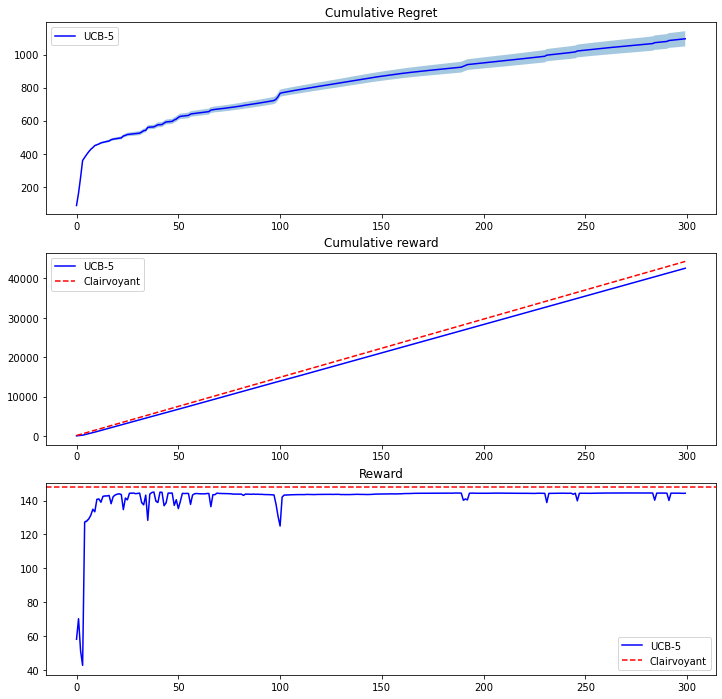

In [20]:

final_reward= np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))
final_cumulative_regret = np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))
final_cumulative_reward = np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))

for k in range (Settings.NUM_PLOT_ITERATION):
    graph = Graph(mode="full", weights=True)
    env = EnvironmentPricing(4, graph, 1)
    learner = Ucb5(4, env.prices, env.secondaries)
    clairvoyant = Clairvoyant(env.prices, env.conversion_rates, env.classes, env.secondaries, env.num_product_sold,
                              graph, env.alpha_ratios)
    best_revenue = clairvoyant.revenue_given_arms([0, 1, 2, 2, 3], 0)
    opt_rew = []
    actual_rew = []
    for i in range(Settings.NUM_OF_DAYS):
        pulled_arms = learner.act()
        print(pulled_arms)
        for j in range(Settings.DAILY_INTERACTIONS):
            visited_products, num_bought_products, num_primary = env.round(pulled_arms)
            learner.updateHistory(pulled_arms, visited_products, num_bought_products, num_primary)

        learner.update(pulled_arms)
        actual_rew.append(learner.revenue_given_arms(pulled_arms))
        opt_rew.append(best_revenue)

    final_cumulative_regret[k, :] = np.cumsum(opt_rew) - np.cumsum(actual_rew)
    final_cumulative_reward[k,:] = np.cumsum(actual_rew)
    final_reward[k:] = actual_rew


#REGRET
print("FINAL CUM REGRET: ")
print(final_cumulative_regret)

mean_cumulative_regret = np.mean(final_cumulative_regret, axis=0)
stdev_regret= np.std(final_cumulative_regret, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_cumulative_regret)


#Cumulative REWARD
print("FINAL CUM REWARD: ")
print(final_cumulative_reward)

mean_cumulative_reward = np.mean(final_cumulative_reward, axis=0)
stdev_cumulative_reward= np.std(final_cumulative_reward, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_cumulative_reward)

#AREWARD
print("FINAL REWARD: ")
print(final_reward)

mean_final_reward = np.mean(final_reward, axis=0)
stdev_reward= np.std(final_reward, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_final_reward)



best_revenue_array = [best_revenue for i in range(Settings.NUM_OF_DAYS)]


fig, ax = plt.subplots(nrows=3,ncols=1, figsize=(12,12))
ax[0].plot(mean_cumulative_regret, color='blue', label='UCB-5')
ax[0].fill_between(range(Settings.NUM_OF_DAYS), mean_cumulative_regret - stdev_regret,mean_cumulative_regret + stdev_regret, alpha=0.4)
ax[0].set_title('Cumulative Regret')

ax[1].plot(mean_cumulative_reward, color='blue', label='UCB-5')
ax[1].fill_between(range(Settings.NUM_OF_DAYS), mean_cumulative_reward - stdev_cumulative_reward, mean_cumulative_reward + stdev_cumulative_reward, alpha=0.4)
ax[1].plot(np.cumsum(best_revenue_array), color='red', linestyle='--', label='Clairvoyant')
ax[1].set_title('Cumulative reward')

ax[2].plot(mean_final_reward, color='blue', label='UCB-5')
ax[2].fill_between(range(Settings.NUM_OF_DAYS), mean_final_reward - stdev_reward, mean_final_reward + stdev_reward, alpha=0.4)
ax[2].axhline(y=best_revenue, color='red', linestyle='--', label='Clairvoyant')
ax[2].set_title('Reward')


ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()

## TS-5

In [66]:
from step5.TSstep5 import *
from step5.TSstep5 import TS as TS5

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]
[2, 2, 2, 2, 2]
[3, 3, 3, 3, 3]
[0, 1, 0, 1, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 1, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2

/Users/lorispanza/PycharmProjects/onlinelearningapplications-2022/step5/TSstep5.py:97: RuntimeWarning: invalid value encountered in multiply
  nearbyRewardsTable[node][price] = sum(self.visit_probability_estimation[node][price]



[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 

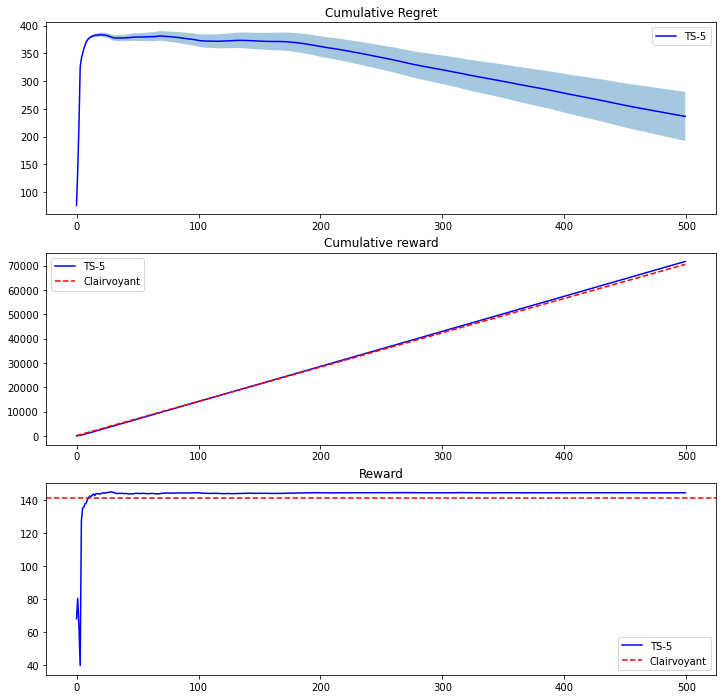

In [67]:
final_reward= np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))
final_cumulative_regret = np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))
final_cumulative_reward = np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))

for k in range (Settings.NUM_PLOT_ITERATION):
    graph = Graph(mode="full", weights=True)
    env = EnvironmentPricing(4, graph, 1)
    learner = TS5(4, env.prices, env.secondaries)
    clairvoyant = Clairvoyant(env.prices, env.conversion_rates, env.classes, env.secondaries, env.num_product_sold,
                              graph, env.alpha_ratios)
    best_revenue = clairvoyant.revenue_given_arms([0, 1, 2, 2, 3], 0)
    opt_rew = []
    actual_rew = []
    for i in range(Settings.NUM_OF_DAYS):
        pulled_arms = learner.act()
        print(pulled_arms)
        for j in range(Settings.DAILY_INTERACTIONS):
            visited_products, num_bought_products, num_primary = env.round(pulled_arms)
            learner.updateHistory(pulled_arms, visited_products, num_bought_products, num_primary)

        learner.update(pulled_arms)
        actual_rew.append(learner.revenue_given_arms(arms=pulled_arms))
        opt_rew.append(best_revenue)

    final_cumulative_regret[k, :] = np.cumsum(opt_rew) - np.cumsum(actual_rew)
    final_cumulative_reward[k,:] = np.cumsum(actual_rew)
    final_reward[k:] = actual_rew


#REGRET
print("FINAL CUM REGRET: ")
print(final_cumulative_regret)

mean_cumulative_regret = np.mean(final_cumulative_regret, axis=0)
stdev_regret= np.std(final_cumulative_regret, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_cumulative_regret)


#Cumulative REWARD
print("FINAL CUM REWARD: ")
print(final_cumulative_reward)

mean_cumulative_reward = np.mean(final_cumulative_reward, axis=0)
stdev_cumulative_reward= np.std(final_cumulative_reward, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_cumulative_reward)

#AREWARD
print("FINAL REWARD: ")
print(final_reward)

mean_final_reward = np.mean(final_reward, axis=0)
stdev_reward= np.std(final_reward, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_final_reward)



best_revenue_array = [best_revenue for i in range(Settings.NUM_OF_DAYS)]


fig, ax = fig, ax = plt.subplots(nrows=3,ncols=1, figsize=(12,12))
ax[0].plot(mean_cumulative_regret, color='blue', label='TS-5')
ax[0].fill_between(range(Settings.NUM_OF_DAYS), mean_cumulative_regret - stdev_regret,mean_cumulative_regret + stdev_regret, alpha=0.4)
ax[0].set_title('Cumulative Regret')

ax[1].plot(mean_cumulative_reward, color='blue', label='TS-5')
ax[1].fill_between(range(Settings.NUM_OF_DAYS), mean_cumulative_reward - stdev_cumulative_reward, mean_cumulative_reward + stdev_cumulative_reward, alpha=0.4)
ax[1].plot(np.cumsum(best_revenue_array), color='red', linestyle='--', label='Clairvoyant')
ax[1].set_title('Cumulative reward')

ax[2].plot(mean_final_reward, color='blue', label='TS-5')
ax[2].fill_between(range(Settings.NUM_OF_DAYS), mean_final_reward - stdev_reward, mean_final_reward + stdev_reward, alpha=0.4)
ax[2].axhline(y=best_revenue, color='red', linestyle='--', label='Clairvoyant')
ax[2].set_title('Reward')


ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()

# Step6

We suggest the use of the following parameters to have a good-looking result:


In [76]:
Settings.NUM_OF_DAYS = 700

Settings.DAY_OF_ABRUPT_CHANGE = int(Settings.NUM_OF_DAYS/2)

Settings.WINDOW_SIZE = int(np.sqrt(Settings.NUM_OF_DAYS))

Settings.DAILY_INTERACTIONS = 200

Settings.NUM_PLOT_ITERATION = 5

The environment is no more static, so we set new conversion rates that will substitute the previous run at a certain point of the simulation

In [77]:
new_conv_rates=[
    [
      [0.7, 0.47, 0.45, 0.2],
      [0.35, 0.3, 0.8, 0.25],
      [0.45, 0.8, 0.4, 0.4],
      [0.7, 0.35, 0.32, 0.25],
      [0.5, 0.55, 0.85, 0.52] ],

    [ [0.9, 0.45, 0.4, 0.35],
      [0.4, 0.8, 0.3, 0.25],
      [0.5, 0.45, 0.9, 0.35],
      [0.4, 0.35, 0.8, 0.3],
      [0.5, 0.45, 0.4, 0.9] ],
    [
      [0.25, 0.79, 0.4, 0.3],
      [0.45, 0.4, 0.35, 0.95],
      [0.55, 0.85, 0.5, 0.45],
      [0.4, 0.82, 0.32, 0.25],
      [0.4, 0.95, 0.35, 0.3]]
  ]

## Sliding Window

In [78]:
from step6.Ucb_Sliding_window import *

[3 3 3 3 3]
[2 2 2 2 2]
[1 1 1 1 1]
[0 0 0 0 0]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 0 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 0 2 3]
[0 1 0 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1

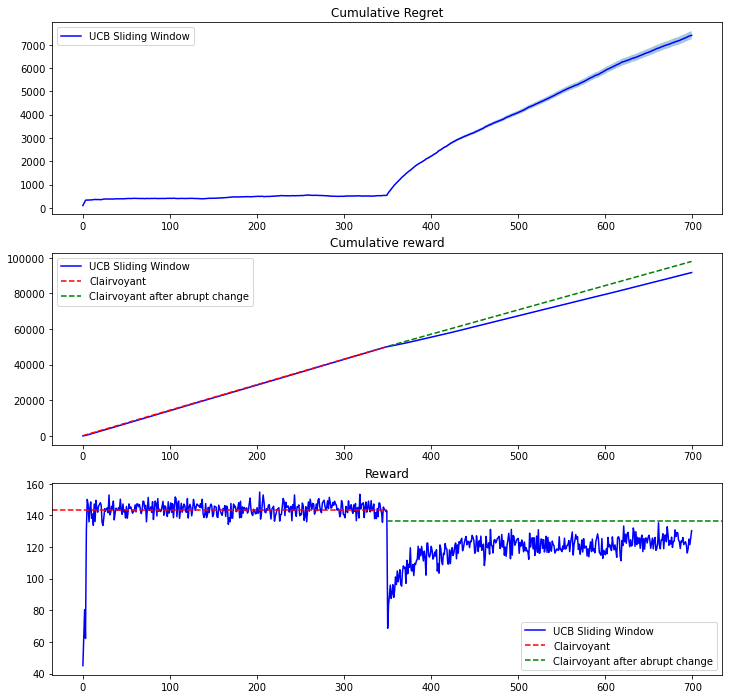

In [79]:

final_reward= np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))
final_cumulative_regret = np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))
final_cumulative_reward = np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))

for k in range (Settings.NUM_PLOT_ITERATION):
    graph = Graph(mode="full", weights=True)
    env = Non_stationary_environment(4, graph, 1)
    learner = UCB_Sliding_Window(4, env.prices)

    clairvoyant = Clairvoyant(env.prices, env.conversion_rates, env.classes, env.secondaries, env.num_product_sold, graph, env.alpha_ratios)
    clairvoyant_after_change = Clairvoyant(env.prices, new_conv_rates, env.classes, env.secondaries, env.num_product_sold, graph, env.alpha_ratios)
    best_revenue = clairvoyant.revenue_given_arms([0, 1, 2, 2, 3], 0)
    best_revenue_after_change = clairvoyant_after_change.revenue_given_arms([0, 2, 1, 0, 2], 0)
    best_revenue_array = [best_revenue for i in range(Settings.DAY_OF_ABRUPT_CHANGE)] + [best_revenue_after_change for i in range(Settings.DAY_OF_ABRUPT_CHANGE)]
    opt_rew = []
    actual_rew = []
    best_rew = best_revenue
    for i in range(Settings.NUM_OF_DAYS):
        pulled_arms = learner.act()
        print(pulled_arms)
        if i==Settings.DAY_OF_ABRUPT_CHANGE:
            env.setNewConvRates(new_conv_rates)
            print("Cambio")
            best_rew=best_revenue_after_change
        for j in range(Settings.DAILY_INTERACTIONS):
            visited_products, num_bought_products, num_primary = env.round(pulled_arms)
            learner.updateHistory(pulled_arms, visited_products, num_bought_products, num_primary)

        learner.update(pulled_arms)
        actual_rew.append(learner.revenue_given_arms(arms=pulled_arms))
        opt_rew.append(best_rew)

    final_cumulative_regret[k, :] = np.cumsum(opt_rew) - np.cumsum(actual_rew)
    final_cumulative_reward[k,:] = np.cumsum(actual_rew)
    final_reward[k:] = actual_rew


#REGRET
print("FINAL CUM REGRET: ")
print(final_cumulative_regret)

mean_cumulative_regret = np.mean(final_cumulative_regret, axis=0)
stdev_regret= np.std(final_cumulative_regret, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_cumulative_regret)

#Cumulative REWARD
print("FINAL CUM REWARD: ")
print(final_cumulative_reward)

mean_cumulative_reward = np.mean(final_cumulative_reward, axis=0)
stdev_cumulative_reward= np.std(final_cumulative_reward, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_cumulative_reward)

#AREWARD
print("FINAL REWARD: ")
print(final_reward)

mean_final_reward = np.mean(final_reward, axis=0)
stdev_reward= np.std(final_reward, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_final_reward)

fig, ax = plt.subplots(nrows=3,ncols=1, figsize=(12,12))
ax[0].plot(mean_cumulative_regret, color='blue', label='UCB Sliding Window')
ax[0].fill_between(range(Settings.NUM_OF_DAYS), mean_cumulative_regret - stdev_regret,mean_cumulative_regret + stdev_regret, alpha=0.4)
ax[0].set_title('Cumulative Regret')

ax[1].plot(mean_cumulative_reward, color='blue', label='UCB Sliding Window')
ax[1].fill_between(range(Settings.NUM_OF_DAYS), mean_cumulative_reward - stdev_cumulative_reward, mean_cumulative_reward + stdev_cumulative_reward, alpha=0.4)
ax[1].plot(np.cumsum(best_revenue_array)[:Settings.DAY_OF_ABRUPT_CHANGE], color='red', linestyle='--', label='Clairvoyant')
xx = [i for i in range(Settings.DAY_OF_ABRUPT_CHANGE+1,Settings.NUM_OF_DAYS)]
ax[1].plot(xx, np.cumsum(best_revenue_array)[Settings.DAY_OF_ABRUPT_CHANGE+1:],
           color='green', linestyle='--', label='Clairvoyant after abrupt change')
ax[1].set_title('Cumulative reward')

ax[2].plot(mean_final_reward, color='blue', label='UCB Sliding Window')
ax[2].fill_between(range(Settings.NUM_OF_DAYS), mean_final_reward - stdev_reward, mean_final_reward + stdev_reward, alpha=0.4)
ax[2].axhline(y=best_revenue, xmin=0., xmax=Settings.DAY_OF_ABRUPT_CHANGE/Settings.NUM_OF_DAYS,
              color='red', linestyle='--', label='Clairvoyant')
ax[2].axhline(y=best_revenue_after_change, xmin=Settings.DAY_OF_ABRUPT_CHANGE/Settings.NUM_OF_DAYS, xmax=1.,
              color='green', linestyle='--', label='Clairvoyant after abrupt change')
ax[2].set_title('Reward')

ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()

## Change Detection

In [60]:
from step6.Ucb_Change_detection import *

[0 0 0 0 0]
65.80369322705205
[1 1 1 1 1]
87.61075041153762
[2 2 2 2 2]
62.39506652004355
[3 3 3 3 3]
43.15715564484562
[0 1 2 2 3]
132.1610938341073
[0 1 2 1 3]
136.93606842195314
[0 1 2 2 3]
135.66581017746705
[0 1 1 2 3]
111.0731698073651
[0 1 2 2 3]
140.27491494237654
[0 1 2 2 3]
138.52483651615788
[0 1 2 0 3]
138.48699677810933
[0 1 2 2 3]
140.97111705371316
[0 1 2 2 3]
141.4347890484491
[0 1 2 2 3]
141.48476408947408
[0 1 2 2 3]
142.09846361144866
[0 1 2 2 3]
143.22111250074562
[0 1 2 2 3]
144.05542214535285
[0 1 2 2 3]
144.1540880338718
[0 1 2 2 3]
143.60129141035213
[0 1 2 2 3]
142.9127572517317
[0 1 0 2 3]
111.27878458003559
[0 1 2 2 3]
142.76948187594465
[0 1 2 2 3]
142.66703240200764
[0 1 2 2 3]
142.25878215780736
[0 1 2 1 3]
140.09344605091093
[0 1 2 2 3]
142.72350632006604
[0 1 2 0 3]
138.54888217392826
[0 1 2 2 3]
142.1603251450447
[0 1 2 2 3]
142.09937917005956
[0 1 2 2 3]
141.02612090451635
[0 1 2 2 3]
141.53978035619764
[0 1 2 2 3]
141.3578097159436
[0 1 2 2 3]
141.768

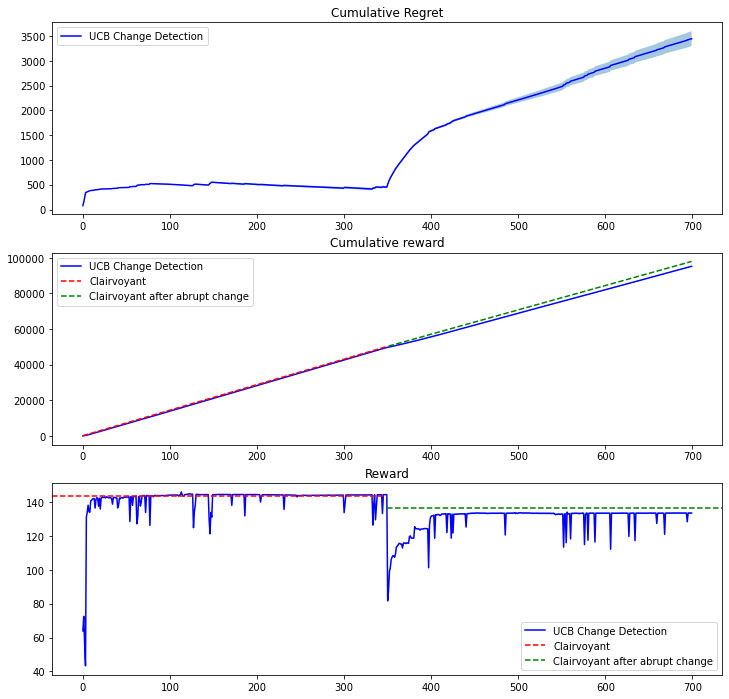

In [72]:
final_reward= np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))
final_cumulative_regret = np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))
final_cumulative_reward = np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))

for k in range (Settings.NUM_PLOT_ITERATION):
    graph = Graph(mode="full", weights=True)
    env = Non_stationary_environment(4, graph, 1)
    learner = Ucb_Change_detection(4, env.prices,env.secondaries)

    clairvoyant = Clairvoyant(env.prices, env.conversion_rates, env.classes, env.secondaries, env.num_product_sold, graph, env.alpha_ratios)
    clairvoyant_after_change = Clairvoyant(env.prices, new_conv_rates, env.classes, env.secondaries, env.num_product_sold, graph, env.alpha_ratios)
    best_revenue = clairvoyant.revenue_given_arms([0, 1, 2, 2, 3], 0)
    best_revenue_after_change = clairvoyant_after_change.revenue_given_arms([0, 2, 1, 0, 2], 0)
    best_revenue_array = [best_revenue for i in range(Settings.DAY_OF_ABRUPT_CHANGE)] + [best_revenue_after_change for i in range(Settings.DAY_OF_ABRUPT_CHANGE)]
    opt_rew = []
    actual_rew = []
    best_rew = best_revenue
    for i in range(Settings.NUM_OF_DAYS):
        pulled_arms = learner.act()
        print(pulled_arms)
        if i==Settings.DAY_OF_ABRUPT_CHANGE:
            env.setNewConvRates(new_conv_rates)
            print("Cambio")
            best_rew=best_revenue_after_change
        for j in range(Settings.DAILY_INTERACTIONS):
            visited_products, num_bought_products, num_primary = env.round(pulled_arms)
            learner.updateHistory(pulled_arms, visited_products, num_bought_products, num_primary)

        learner.update(pulled_arms)
        actual_rew.append(learner.revenue_given_arms(arms=pulled_arms))
        print(actual_rew[-1])
        opt_rew.append(best_rew)

    final_cumulative_regret[k, :] = np.cumsum(opt_rew) - np.cumsum(actual_rew)
    final_cumulative_reward[k,:] = np.cumsum(actual_rew)
    final_reward[k:] = actual_rew


#REGRET
print("FINAL CUM REGRET: ")
print(final_cumulative_regret)

mean_cumulative_regret = np.mean(final_cumulative_regret, axis=0)
stdev_regret= np.std(final_cumulative_regret, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_cumulative_regret)

#Cumulative REWARD
print("FINAL CUM REWARD: ")
print(final_cumulative_reward)

mean_cumulative_reward = np.mean(final_cumulative_reward, axis=0)
stdev_cumulative_reward= np.std(final_cumulative_reward, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_cumulative_reward)

#AREWARD
print("FINAL REWARD: ")
print(final_reward)

mean_final_reward = np.mean(final_reward, axis=0)
stdev_reward= np.std(final_reward, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_final_reward)

fig, ax = plt.subplots(nrows=3,ncols=1, figsize=(12,12))
ax[0].plot(mean_cumulative_regret, color='blue', label='UCB Change Detection')
ax[0].fill_between(range(Settings.NUM_OF_DAYS), mean_cumulative_regret - stdev_regret,mean_cumulative_regret + stdev_regret, alpha=0.4)
ax[0].set_title('Cumulative Regret')

ax[1].plot(mean_cumulative_reward, color='blue', label='UCB Change Detection')
ax[1].fill_between(range(Settings.NUM_OF_DAYS), mean_cumulative_reward - stdev_cumulative_reward, mean_cumulative_reward + stdev_cumulative_reward, alpha=0.4)
ax[1].plot(np.cumsum(best_revenue_array)[:Settings.DAY_OF_ABRUPT_CHANGE], color='red', linestyle='--', label='Clairvoyant')
xx = [i for i in range(Settings.DAY_OF_ABRUPT_CHANGE+1,Settings.NUM_OF_DAYS)]
ax[1].plot(xx, np.cumsum(best_revenue_array)[Settings.DAY_OF_ABRUPT_CHANGE+1:],
           color='green', linestyle='--', label='Clairvoyant after abrupt change')
ax[1].set_title('Cumulative reward')

ax[2].plot(mean_final_reward, color='blue', label='UCB Change Detection')
ax[2].fill_between(range(Settings.NUM_OF_DAYS), mean_final_reward - stdev_reward, mean_final_reward + stdev_reward, alpha=0.4)
ax[2].axhline(y=best_revenue, xmin=0., xmax=Settings.DAY_OF_ABRUPT_CHANGE/Settings.NUM_OF_DAYS,
              color='red', linestyle='--', label='Clairvoyant')
ax[2].axhline(y=best_revenue_after_change, xmin=Settings.DAY_OF_ABRUPT_CHANGE/Settings.NUM_OF_DAYS, xmax=1.,
              color='green', linestyle='--', label='Clairvoyant after abrupt change')
ax[2].set_title('Reward')

ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()

# Step 7

Necessary imports for Step 7 to properly work are:

In [32]:
from step7.ContextGenerator import ContextGenerator
from step7.ContextNode import ContextNode
from step7.ContextualLearner import ContextualLearner
from step7.UcbStep7 import Ucb
from step7.TSstep7 import TS

## Context Generation with Context-UCB1

We suggest the use of the following parameters to have a good-looking result:

In [33]:
Settings.NUM_PLOT_ITERATION = 20
Settings.NUM_OF_DAYS = 90
Settings.DAILY_INTERACTIONS = 100

Then, the code that regulates the execution is:

Execution 1: day 0
Execution 1: day 1
Execution 1: day 2
Execution 1: day 3
Execution 1: day 4
Execution 1: day 5
Execution 1: day 6
Execution 1: day 7
Execution 1: day 8
Execution 1: day 9
Execution 1: day 10
Execution 1: day 11
Execution 1: day 12
Execution 1: day 13
Execution 1: day 14
AFTER SPLIT: 

[ {'feature-1': False} ]
[ {} ]
[ {'feature-1': True} ]
Execution 1: day 15
Execution 1: day 16
Execution 1: day 17
Execution 1: day 18
Execution 1: day 19
Execution 1: day 20
Execution 1: day 21
Execution 1: day 22
Execution 1: day 23
Execution 1: day 24
Execution 1: day 25
Execution 1: day 26
Execution 1: day 27
Execution 1: day 28
AFTER SPLIT: 

[ {'feature-1': False, 'feature-2': False} ]
[ {'feature-1': False} ]
[ {'feature-1': False, 'feature-2': True} ]
[ {} ]
[ {'feature-1': True} ]
Execution 1: day 29
Execution 1: day 30
Execution 1: day 31
Execution 1: day 32
Execution 1: day 33
Execution 1: day 34
Execution 1: day 35
Execution 1: day 36
Execution 1: day 37
Execution 1: day 38

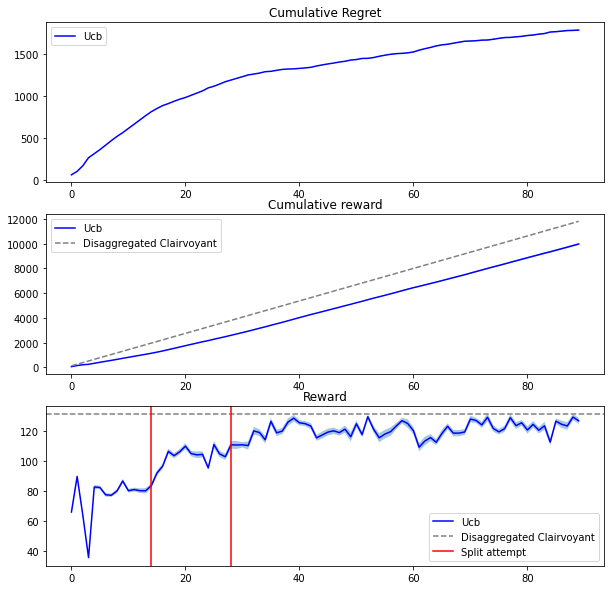

In [34]:
color = 'blue'

final_reward= np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))
final_cumulative_regret = np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))
final_cumulative_reward = np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))

for k in range (Settings.NUM_PLOT_ITERATION):

    graph = Graph(mode="full", weights=True)
    env = EnvironmentPricing(4, graph, 1)
    context_learner = ContextualLearner(features=env.features, n_arms=env.n_arms, n_products=len(env.graph.nodes))

    clairvoyant = Clairvoyant(env.prices, env.conversion_rates, env.classes, env.secondaries, env.num_product_sold, graph, env.alpha_ratios)
    best_revenue = clairvoyant.revenue_given_arms(arms=[0, 1, 2, 2, 3], chosen_class=0)
    best_revenue_array = [best_revenue for _ in range(Settings.NUM_OF_DAYS)]

    # optimal arm for C1: [0, 1, 2, 2, 3]
    # optimal arm for C2: [0, 2, 1, 0, 2]
    # optimal arm for C3: [1, 3, 1, 1, 1]
    best_arms_per_class = [[0, 1, 2, 2, 3], [0, 2, 1, 0, 2], [1, 3, 1, 1, 1]]
    best_disaggr_revenue = clairvoyant.disaggr_revenue_given_arms(arms=best_arms_per_class, env=env)

    root_learner = Ucb(4, env.prices, env.secondaries, graph)

    root_node = ContextNode(features=env.features, base_learner=root_learner)
    context_learner.update_context_tree(root_node)

    # confidence used for lower bounds is hardcoded to 0.1!
    context_generator = ContextGenerator(features=env.features, contextual_learner=context_learner, confidence=0.1)

    best_revenue = clairvoyant.disaggr_revenue_given_arms(arms=best_arms_per_class, env=env)
    opt_rew = []
    actual_rew = []

    for i in range(Settings.NUM_OF_DAYS):

        print("Execution " + str(k+1) + ": day " + str(i))

        if i % 14 == 0 and i != 0:
            context_generator.context_generation()

        for j in range(Settings.DAILY_INTERACTIONS):

            customer = Customer(reservation_price=100, num_products=len(graph.nodes), graph=graph, env=env)

            learner = context_learner.get_learner_by_context(current_features=customer.features)

            pulled_arms = learner.act()

            visited_products, num_bought_products, num_primary = env.round(pulled_arms, customer)
            learner.updateHistory(pulled_arms, visited_products, num_bought_products, num_primary)
            context_generator.collect_daily_data(pulled_arms=pulled_arms,
                                                 visited_products=visited_products,
                                                 num_bought_products=num_bought_products,
                                                 num_primaries=num_primary,
                                                 features=customer.features)
            customer.set_as_new()

        learner.update(pulled_arms)
        context_generator.update_average_rewards(current_features=customer.features)

        actual_rew.append(context_generator.average_rewards[-1])
        opt_rew.append(best_revenue)

    final_cumulative_regret[k, :] = np.cumsum(opt_rew) - np.cumsum(actual_rew)
    final_cumulative_reward[k, :] = np.cumsum(actual_rew)
    final_reward[k:] = actual_rew


#REGRET
print("FINAL CUMULATIVE REGRET: ")
print(final_cumulative_regret)

mean_cumulative_regret = np.mean(final_cumulative_regret, axis=0)
stdev_regret = np.std(final_cumulative_regret, axis=0) / np.sqrt(Settings.NUM_OF_DAYS*Settings.DAILY_INTERACTIONS)
print("MEAN: ")
print(mean_cumulative_regret)


#Cumulative REWARD
print("FINAL CUMULATIVE REWARD: ")
print(final_cumulative_reward)

mean_cumulative_reward = np.mean(final_cumulative_reward, axis=0)
stdev_cumulative_reward = np.std(final_cumulative_reward, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_cumulative_reward)

#REWARD
print("FINAL REWARD: ")
print(final_reward)

mean_final_reward = np.mean(final_reward, axis=0)
stdev_reward = np.std(final_reward, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_final_reward)

best_revenue_array = [best_revenue for i in range(Settings.NUM_OF_DAYS)]

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))
ax[0].plot(mean_cumulative_regret, color=color, label='Ucb')
ax[0].fill_between(range(Settings.NUM_OF_DAYS), mean_cumulative_regret - stdev_regret, mean_cumulative_regret + stdev_regret, alpha=0.4)
ax[0].set_title('Cumulative Regret')

ax[1].plot(mean_cumulative_reward, color=color, label='Ucb')
ax[1].fill_between(range(Settings.NUM_OF_DAYS), mean_cumulative_reward - stdev_cumulative_reward, mean_cumulative_reward + stdev_cumulative_reward, alpha=0.4)
ax[1].plot(np.cumsum(best_revenue_array), color='grey', linestyle='--', label='Disaggregated Clairvoyant')
ax[1].set_title('Cumulative reward')

ax[2].plot(mean_final_reward, color=color, label='Ucb')
ax[2].fill_between(range(Settings.NUM_OF_DAYS), mean_final_reward - stdev_reward, mean_final_reward + stdev_reward, alpha=0.4)
ax[2].axhline(y=best_revenue, color='grey', linestyle='--', label='Disaggregated Clairvoyant')
ax[2].axvline(x=14, color='red', label="Split attempt")
ax[2].axvline(x=28, color='red')
ax[2].set_title('Reward')

ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()

## Context Generation with Context-TS

An appropriate choice of parameters in this case is the following:

In [35]:
Settings.NUM_PLOT_ITERATION = 20
Settings.NUM_OF_DAYS = 90
Settings.DAILY_INTERACTIONS = 220

and the execution code is the one below:

Execution 1: day 0
Execution 1: day 1
Execution 1: day 2
Execution 1: day 3
Execution 1: day 4
Execution 1: day 5
Execution 1: day 6
Execution 1: day 7
Execution 1: day 8
Execution 1: day 9
Execution 1: day 10
Execution 1: day 11
Execution 1: day 12
Execution 1: day 13
Execution 1: day 14
AFTER SPLIT: 

[ {'feature-1': False} ]
[ {} ]
[ {'feature-1': True} ]
Execution 1: day 15
Execution 1: day 16
Execution 1: day 17
Execution 1: day 18
Execution 1: day 19
Execution 1: day 20
Execution 1: day 21
Execution 1: day 22
Execution 1: day 23
Execution 1: day 24
Execution 1: day 25
Execution 1: day 26
Execution 1: day 27
Execution 1: day 28
AFTER SPLIT: 

[ {'feature-1': False, 'feature-2': False} ]
[ {'feature-1': False} ]
[ {'feature-1': False, 'feature-2': True} ]
[ {} ]
[ {'feature-1': True} ]
Execution 1: day 29
Execution 1: day 30
Execution 1: day 31
Execution 1: day 32
Execution 1: day 33
Execution 1: day 34
Execution 1: day 35
Execution 1: day 36
Execution 1: day 37
Execution 1: day 38

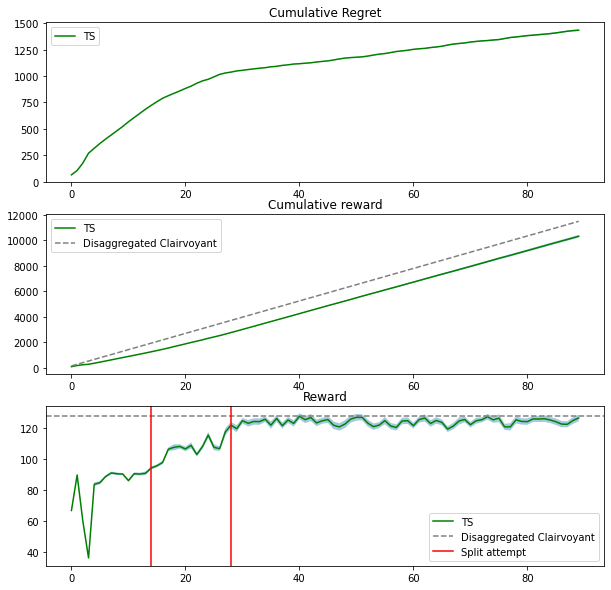

In [36]:
color = 'green'

final_reward= np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))
final_cumulative_regret = np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))
final_cumulative_reward = np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))

for k in range (Settings.NUM_PLOT_ITERATION):

    graph = Graph(mode="full", weights=True)
    env = EnvironmentPricing(4, graph, 1)
    context_learner = ContextualLearner(features=env.features, n_arms=env.n_arms, n_products=len(env.graph.nodes))

    clairvoyant = Clairvoyant(env.prices, env.conversion_rates, env.classes, env.secondaries, env.num_product_sold, graph, env.alpha_ratios)
    best_revenue = clairvoyant.revenue_given_arms(arms=[0, 1, 2, 2, 3], chosen_class=0)
    best_revenue_array = [best_revenue for _ in range(Settings.NUM_OF_DAYS)]

    # optimal arm for C1: [0, 1, 2, 2, 3]
    # optimal arm for C2: [0, 2, 1, 0, 2]
    # optimal arm for C3: [1, 3, 1, 1, 1]
    best_arms_per_class = [[0, 1, 2, 2, 3], [0, 2, 1, 0, 2], [1, 3, 1, 1, 1]]
    best_disaggr_revenue = clairvoyant.disaggr_revenue_given_arms(arms=best_arms_per_class, env=env)

    root_learner = TS(4, env.prices, env.secondaries, graph)

    root_node = ContextNode(features=env.features, base_learner=root_learner)
    context_learner.update_context_tree(root_node)

    # confidence used for lower bounds is hardcoded to 0.1!
    context_generator = ContextGenerator(features=env.features, contextual_learner=context_learner, confidence=0.1)

    best_revenue = clairvoyant.disaggr_revenue_given_arms(arms=best_arms_per_class, env=env)
    opt_rew = []
    actual_rew = []

    for i in range(Settings.NUM_OF_DAYS):

        print("Execution " + str(k+1) + ": day " + str(i))

        if i % 14 == 0 and i != 0:
            context_generator.context_generation()

        for j in range(Settings.DAILY_INTERACTIONS):

            customer = Customer(reservation_price=100, num_products=len(graph.nodes), graph=graph, env=env)

            learner = context_learner.get_learner_by_context(current_features=customer.features)

            pulled_arms = learner.act()

            visited_products, num_bought_products, num_primary = env.round(pulled_arms, customer)
            learner.updateHistory(pulled_arms, visited_products, num_bought_products, num_primary)
            context_generator.collect_daily_data(pulled_arms=pulled_arms,
                                                 visited_products=visited_products,
                                                 num_bought_products=num_bought_products,
                                                 num_primaries=num_primary,
                                                 features=customer.features)
            customer.set_as_new()

        learner.update(pulled_arms)
        context_generator.update_average_rewards(current_features=customer.features)

        actual_rew.append(learner.average_reward[-1])
        opt_rew.append(best_revenue)

    final_cumulative_regret[k, :] = np.cumsum(opt_rew) - np.cumsum(actual_rew)
    final_cumulative_reward[k, :] = np.cumsum(actual_rew)
    final_reward[k:] = actual_rew


#REGRET
print("FINAL CUMULATIVE REGRET: ")
print(final_cumulative_regret)

mean_cumulative_regret = np.mean(final_cumulative_regret, axis=0)
stdev_regret = np.std(final_cumulative_regret, axis=0) / np.sqrt(Settings.NUM_OF_DAYS*Settings.DAILY_INTERACTIONS)
print("MEAN: ")
print(mean_cumulative_regret)


#Cumulative REWARD
print("FINAL CUMULATIVE REWARD: ")
print(final_cumulative_reward)

mean_cumulative_reward = np.mean(final_cumulative_reward, axis=0)
stdev_cumulative_reward = np.std(final_cumulative_reward, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_cumulative_reward)

#REWARD
print("FINAL REWARD: ")
print(final_reward)

mean_final_reward = np.mean(final_reward, axis=0)
stdev_reward = np.std(final_reward, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_final_reward)

best_revenue_array = [best_revenue for i in range(Settings.NUM_OF_DAYS)]

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))
ax[0].plot(mean_cumulative_regret, color=color, label='TS')
ax[0].fill_between(range(Settings.NUM_OF_DAYS), mean_cumulative_regret - stdev_regret, mean_cumulative_regret + stdev_regret, alpha=0.4)
ax[0].set_title('Cumulative Regret')

ax[1].plot(mean_cumulative_reward, color=color, label='TS')
ax[1].fill_between(range(Settings.NUM_OF_DAYS), mean_cumulative_reward - stdev_cumulative_reward, mean_cumulative_reward + stdev_cumulative_reward, alpha=0.4)
ax[1].plot(np.cumsum(best_revenue_array), color='grey', linestyle='--', label='Disaggregated Clairvoyant')
ax[1].set_title('Cumulative reward')

ax[2].plot(mean_final_reward, color=color, label='TS')
ax[2].fill_between(range(Settings.NUM_OF_DAYS), mean_final_reward - stdev_reward, mean_final_reward + stdev_reward, alpha=0.4)
ax[2].axhline(y=best_revenue, color='grey', linestyle='--', label='Disaggregated Clairvoyant')
ax[2].axvline(x=14, color='red', label="Split attempt")
ax[2].axvline(x=28, color='red')
ax[2].set_title('Reward')

ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()